In [1]:
from impl.shors.Shors_Original_Semiclassical import shors_semiclassical

shots = 1000

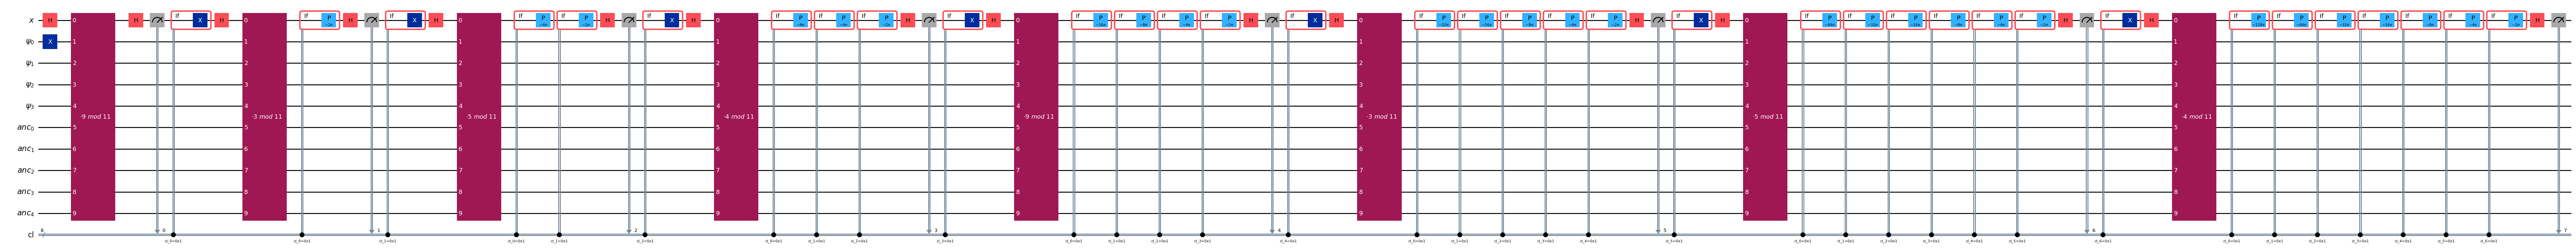

In [2]:
from api.Metrics import gate_count_metric
from api.CircuitChooser import CircuitChooser

# g^k = 1 mod p, find k
p = 11
g = 4
r = -1

CircuitChooser()._metric = gate_count_metric
circuit = shors_semiclassical(g, p)

circuit.draw(output='mpl', fold=-1)

In [3]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

simulator = AerSimulator()
# Allow circuit to run on our backend.

circuit = generate_preset_pass_manager(backend=simulator, optimization_level=3).run(circuit)

print(circuit.count_ops())

job = simulator.run(circuit, shots=shots)

counts = job.result().get_counts()
print(counts)

OrderedDict({'ccx': 2408, 'cx': 1404, 'x': 529, 'mcx': 256, 'if_else': 35, 'h': 16, 'measure': 8})
{'01000100': 1, '11101100': 1, '00110100': 1, '10011100': 1, '01111011': 1, '11000011': 1, '01101101': 1, '01011011': 1, '01010001': 4, '01110011': 1, '11011100': 1, '10001010': 2, '11100111': 1, '00011001': 2, '00001110': 1, '11101101': 3, '01101010': 2, '10101100': 3, '11110111': 7, '11001010': 2, '11000010': 1, '11001111': 4, '00111010': 2, '11110011': 3, '11010000': 3, '00010111': 3, '01011101': 30, '10110111': 2, '01010111': 27, '01011111': 9, '10101111': 13, '01110101': 41, '11101001': 1, '01010101': 37, '00011110': 1, '11111110': 9, '11011011': 2, '00110111': 2, '10100110': 2, '10100101': 3, '10110010': 2, '00111011': 3, '11010001': 2, '10111010': 29, '11111010': 13, '00101110': 4, '00111111': 2, '01001111': 1, '10001011': 2, '01111111': 11, '11011010': 1, '01000101': 1, '11101011': 14, '10101110': 33, '11001011': 1, '00010101': 8, '11000111': 1, '00111110': 1, '11111011': 7, '1010

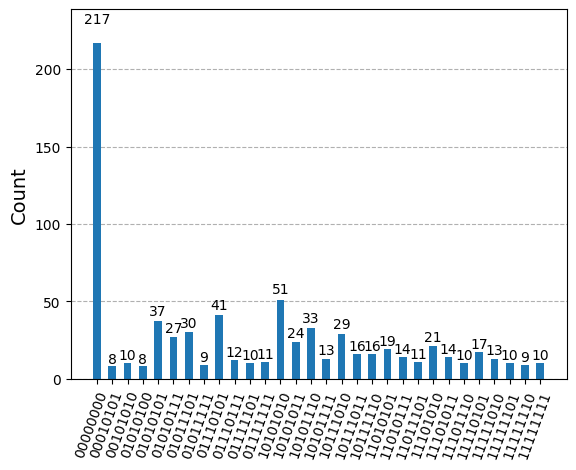

In [4]:
from qiskit.visualization import plot_histogram

# Hold back so the plots aren't too messy.
filtered_counts = dict(filter(lambda item: not (isinstance(item[1], int) and item[1] < 8), counts.items()))
plot_histogram(filtered_counts)
#plot_distribution(counts)

In [5]:
# For plotting in LateX export the dictionary
print(filtered_counts)

{'01011101': 30, '01010111': 27, '01011111': 9, '10101111': 13, '01110101': 41, '01010101': 37, '11111110': 9, '10111010': 29, '11111010': 13, '01111111': 11, '11101011': 14, '10101110': 33, '00010101': 8, '10111011': 16, '00000000': 217, '01010100': 8, '11110101': 17, '01111101': 10, '11111101': 10, '11101110': 10, '11101010': 21, '11011101': 11, '10101010': 51, '10111110': 16, '10101011': 24, '11111111': 10, '11010101': 19, '01110111': 12, '00101010': 10, '11010111': 14}


In [6]:
import math
# Use Quaspy for post processing
from quaspy.math.groups import IntegerModRingMulSubgroupElement
from quaspy.orderfinding.general.postprocessing.ekera import solve_j_for_r

candidates = []
n = math.ceil(math.log2(p))
if r == -1:
    r = p - 1  # Backup frequency if all else fails, is always p - 1
    for (j, _) in filtered_counts.items():
        r_cand = solve_j_for_r(j, n, n, IntegerModRingMulSubgroupElement(g, p))
        candidates.append(r_cand)
        r = min(r, r_cand)

print(f"# measurements that extracted the period correctly: {candidates.count(r)}")
print(f"# measurements that extracted the period incorrectly: {len(candidates) - candidates.count(r)}")
print(f"# Success: {candidates.count(r) / len(candidates)}")
print("Period: " + str(r))
# When we are solving for g^x = 1, then the period is the solution.
print("Solution: " + str(r))

# measurements that extracted the period correctly: 8
# measurements that extracted the period incorrectly: 22
# Success: 0.26666666666666666
Period: 5
Solution: 5
